In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import evaluate
import math
from scipy import stats

import matplotlib.pyplot as plt

from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

from scipy import stats

warnings.filterwarnings('ignore')

In [12]:
from pydataset import data

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [20]:
lm = LinearRegression(normalize=True)

lm.fit(tips[['total_bill']], tips[['tip']])

tips['yhat'] = lm.predict(tips[['total_bill']])

### Establish means baseline

In [22]:
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


### Plot and visualize the regression and prediction line

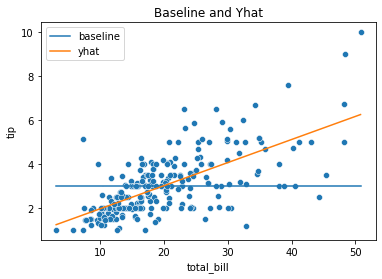

In [26]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips, label='baseline')
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips, label='yhat')
plt.title('Baseline and Yhat')
plt.legend()
plt.show()

### Plot residuals for the model

In [28]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


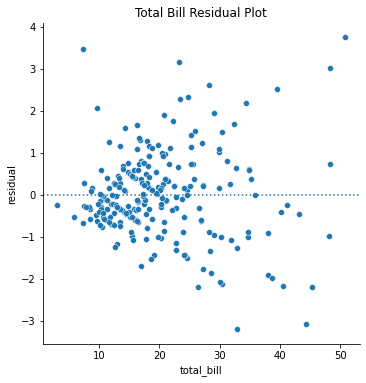

In [36]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips)
plt.axhline(0, ls = ':')
plt.title('Total Bill Residual Plot')
plt.show()

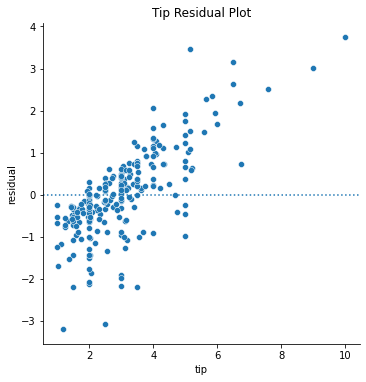

In [37]:
sns.relplot(x = 'tip', y = 'residual', data = tips)
plt.axhline(0, ls = ':')
plt.title('Tip Residual Plot')
plt.show()b

### SSE/ESS/MSE/RMSE Calculations

In [38]:
SSE = (tips.residual**2).sum()
SSE_baseline = (tips.baseline_residual**2).sum()

print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the baseline model is 465.2
 The SSE of the OLS model is 252.8


In [41]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print(f'The mean squared error is: {round(MSE, 3)}')
print(f'The mean squared error baseline is: {round(MSE_baseline, 3)}')

The mean squared error is: 1.036
The mean squared error baseline is: 1.907


In [42]:
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)

print(f'The root mean squared error is: {round(RMSE, 3)}')
print(f'The root mean squared error baseline is: {round(RMSE_baseline, 3)}')

The root mean squared error is: 1.018
The root mean squared error baseline is: 1.381


In [47]:
ESS = sum((tips.yhat - tips.baseline)**2)
TSS = ESS + SSE

print(f'The Explained Sum of Squares is {round(ESS, 3)}')
print(f'The Total Sum of Errors is: {round(TSS, 3)}')

The Explained Sum of Squares is 212.424
The Total Sum of Errors is: 465.212


### Write code that compares the SSE against the SSE_baseline and returns if it performed better than the baseline.

In [49]:
val = [{'evaluation' : 'SSE', 'error' : SSE, 'baseline_error': SSE_baseline, 'btb': SSE_baseline > SSE},
       {'evaluation' : 'MSE', 'error' : MSE, 'baseline_error': MSE_baseline, 'btb': MSE_baseline > MSE},
       {'evaluation' : 'RMSE', 'error' : RMSE, 'baseline_error': RMSE_baseline, 'btb': RMSE_baseline > RMSE}]
df = pd.DataFrame(val)
df.head()

,evaluation,error,baseline_error,btb
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


### $R^2$ score

In [50]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)


0.45661658635167657